In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# 데이터 준비

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/기계학습프로그래밍/3주/Raisin_Dataset.xlsx").dropna()

X = df.drop(columns=["Class"])
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [6]:
df['Class'].value_counts()

,count
Class,
Kecimen,450
Besni,450


Text(0.5, 1.0, 'Class')

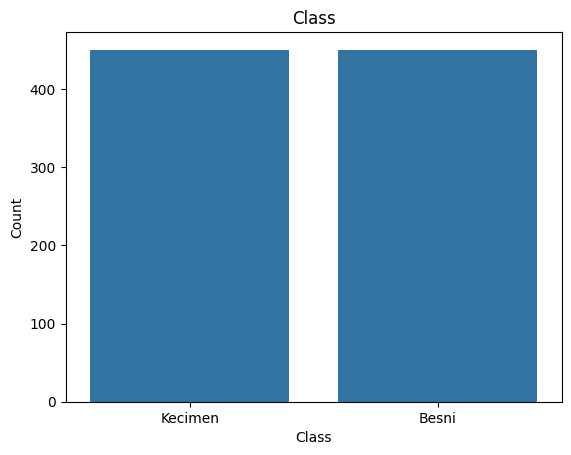

In [7]:
# 레이블 갯수 확인 (그래프)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Class")
plt.xlabel("Class")        # 그래프 x 축 이름
plt.ylabel("Count")        # 그래프 y 축 이름
plt.title("Class")

In [10]:
# 모델 준비

# 1. 결정 트리
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# 2, 랜덤 포레스트
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 3. 로지스틱 회귀
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


In [11]:
# 모델 평가

from sklearn.metrics import accuracy_score

print("Decision Tree:", accuracy_score(y_test, dt_pred))
print("Random Forest:", accuracy_score(y_test, rf_pred))
print("Logistic Regression:", accuracy_score(y_test, lr_pred))

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred )
lr_acc = accuracy_score(y_test, lr_pred)

Decision Tree: 0.8444444444444444
Random Forest: 0.8666666666666667
Logistic Regression: 0.8888888888888888
